A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3668 - loss: 1.7105 - val_accuracy: 0.5535 - val_loss: 1.2254
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5760 - loss: 1.1926 - val_accuracy: 0.6304 - val_loss: 1.0520
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6447 - loss: 1.0059 - val_accuracy: 0.6544 - val_loss: 0.9912
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6843 - loss: 0.8994 - val_accuracy: 0.6792 - val_loss: 0.9214
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7129 - loss: 0.8208 - val_accuracy: 0.6965 - val_loss: 0.8939
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7298 - loss: 0.7611 - val_accuracy: 0.6957 - val_loss: 0.8927
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7493 - loss: 0.7091 - val_accuracy: 0.7083 - val_loss: 0.8657
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7663 - los

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2627 - loss: 2.0151 - val_accuracy: 0.3690 - val_loss: 1.7326
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3841 - loss: 1.7139 - val_accuracy: 0.4059 - val_loss: 1.6488
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4182 - loss: 1.6123 - val_accuracy: 0.4422 - val_loss: 1.5681
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4471 - loss: 1.5388 - val_accuracy: 0.4567 - val_loss: 1.5080
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4592 - loss: 1.5014 - val_accuracy: 0.4515 - val_loss: 1.5300
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4691 - loss: 1.4725 - val_accuracy: 0.4369 - val_loss: 1.5668
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4820 - loss: 1.4476 - val_accuracy: 0.4713 - val_loss: 1.4796
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4921 - loss: 1

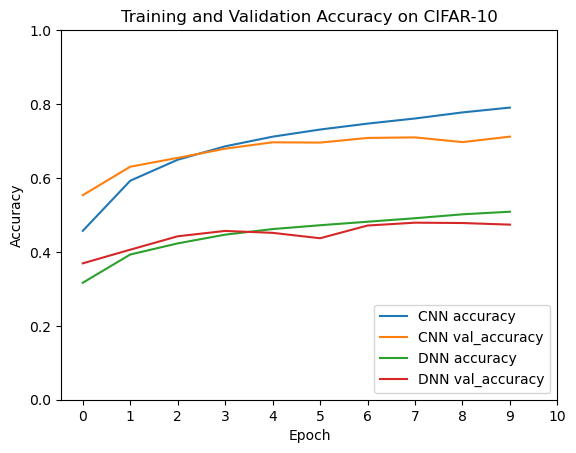

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# CIFAR-10データセットをロードして、トレーニングデータとテストデータに分割
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# データの前処理：画像を正規化（0-255のピクセル値を0-1の範囲に変換）
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# CNNモデルの構築
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# フラット化して全結合層に接続
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

# CNNモデルのコンパイル
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# CNNモデルのトレーニング
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, 
                            validation_data=(test_images, test_labels))

# DNNモデルの構築
dnn_model = models.Sequential()
dnn_model.add(layers.Flatten(input_shape=(32, 32, 3)))
dnn_model.add(layers.Dense(512, activation='relu'))
dnn_model.add(layers.Dense(256, activation='relu'))
dnn_model.add(layers.Dense(128, activation='relu'))
dnn_model.add(layers.Dense(10, activation='softmax'))

# DNNモデルのコンパイル
dnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# DNNモデルのトレーニング
dnn_history = dnn_model.fit(train_images, train_labels, epochs=10, 
                            validation_data=(test_images, test_labels))

# CNNモデルの評価
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nCNN Test accuracy: {cnn_test_acc}')

# DNNモデルの評価
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nDNN Test accuracy: {dnn_test_acc}')

# トレーニングと検証の精度をプロット
plt.plot(cnn_history.history['accuracy'], label='CNN accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN val_accuracy')
plt.plot(dnn_history.history['accuracy'], label='DNN accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='DNN val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xticks(range(0, 11))  # 0から10までの範囲で1単位の目盛りを設定
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.show()